# APPENDIX (Full homework process in code)

## Question 1

### Data Loading and Preprocessing

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = datasets.load_iris()

for i in range(len(iris["data"])):
    if(iris["target"][i]==2):
        iris["data"] = iris["data"][:i, :2]
        iris["target"] = iris["target"][:i]
        break

for i in range(len(iris["target"])):
    if(iris["target"][i]==0):
        iris["target"][i] = 1
    else:
        iris["target"][i] = -1

x = np.zeros((100,3))
for i in range(len(iris["data"])):
    x[i][0] = 1
    for j in range(len(iris["data"][i])):
        x[i][j+1] = iris["data"][i][j]

### Perceptron Learning Algorithm

In [2]:
# x: 100 * 3
y = iris["target"].reshape((100,1)) # y: 100 * 1
w = np.zeros((3,1)) # 3*1
false_flag = 1
iteration_counter = 0

while false_flag:
    i = 0
    while i < len(x):
        if(y[i][0]*(w.reshape((1,3)).dot(x[i]))<=0):
            w += y[i][0]*x[i].reshape((3,1))
            i = len(x)+100
        else:
            if(i==len(x)-1):
                false_flag = 0
            i+=1
    iteration_counter += 1


### Plot of the Original Data

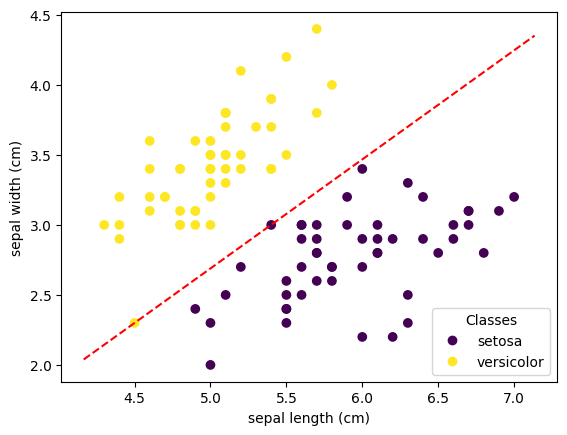

In [3]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
x_vals = np.array(ax.get_xlim())
y_vals = -w[1][0]/w[2][0]*x_vals - w[0][0]/w[2][0]
ax.plot(x_vals, y_vals, '--', color="red")
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

### Logistic Regression

In [4]:
from sklearn import linear_model

logistic_x = iris["data"]
logistic_y = iris["target"]

logistic = linear_model.LogisticRegression()
logistic.fit(logistic_x, logistic_y)
print("coefficient:", logistic.coef_)
print("intercept:", logistic.intercept_ )

coefficient: [[-3.08267284  3.01867739]]
intercept: [7.33819169]


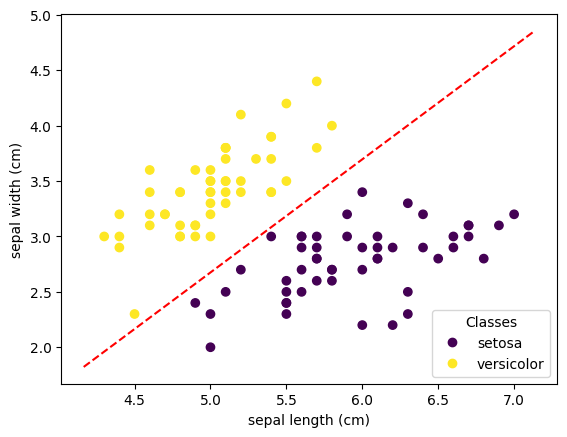

In [5]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
x_vals = np.array(ax.get_xlim())
y_vals = -logistic.coef_[0][0]/logistic.coef_[0][1]*x_vals - logistic.intercept_[0]/logistic.coef_[0][1]
ax.plot(x_vals, y_vals, '--', color="red")
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

### Comparison

* Effectiveness of separating dots of different classes: Logistic is more effective than Perceptron Learning Algorithm.
* Efficiency: Logistic regression calculate the probability directly, whereas Perceptron Learning Algorithm needs 1444 iterations.

## Question 2

### Claasify dots by ReLU

In [6]:
import math
import numpy as np

def ReLU_1(x):
    model_w1 = np.array([[-1],[1]])
    return max(model_w1.reshape(1,2).dot(x.reshape(2,1)),0)

def ReLU_2(x):
    model_w2 = np.array([[1],[-1]])
    return max(model_w2.reshape(1,2).dot(x.reshape(2,1)),0)

dotx = [(0,0), (0,1), (1,0), (1,1)]
model_x = np.array([[0,0], [0,1], [1,0], [1,1]])

dot_outputs = {}

for i in range(len(dotx)):
    if(ReLU_1(model_x[i]) + ReLU_2(model_x[i])):
        dot_outputs[dotx[i]] = -1
    else:
        dot_outputs[dotx[i]] = 1

Class1 = []
Class2 = []

for i in dot_outputs:
    if dot_outputs[i] == -1:
        Class2.append(i)
    else:
        Class1.append(i)

print("The dots and its classification: ", dot_outputs)
print("")
print("Class1: ", end="")
for i in range(len(Class1)):
    if i == len(Class1)-1:
        print(Class1[i])
    else:
        print(Class1[i], end=", ")
print("Class2: ", end="")
for i in range(len(Class2)):
    if i == len(Class2)-1:
        print(Class2[i])
    else:
        print(Class2[i], end=", ")

The dots and its classification:  {(0, 0): 1, (0, 1): -1, (1, 0): -1, (1, 1): 1}

Class1: (0, 0), (1, 1)
Class2: (0, 1), (1, 0)


## Question 3_Handwriting

### Calculating the f.o.c. of logistic activation function

#### Logistic activation function: $f(x) = \frac{1}{1 + e^{-x}}$

\begin{align*}
\frac{\partial}{\partial x}f(x) &= \frac{\partial}{\partial x}(1 + e^{-x})^{-1}\\ 
&= -(1 + e^{-x})^{-2} * \frac{\partial}{\partial x}(1 + e^{-x})\\
&= -(1 + e^{-x})^{-2} * (-e^{-x})\\
&= (e^{-x}) * (1 + e^{-x})^{-2}\\
&= \frac{1}{1 + e^{-x}} * \frac{e^{-x}}{1 + e^{-x}}\\
~\\
&= f(x)(1-f(x))
\end{align*}

### Get the maximum

#### Let $g(x)= f(x)(1-f(x))$
We want to find f.o.c. of $f(x)$.
\begin{align*}
\frac{\partial}{\partial x}g(x) &= (\frac{\partial}{\partial x}f(x)) * (1-f(x)) + f(x) * \frac{\partial}{\partial x}(1-f(x))\\
&= f(x)(1-f(x)) * (1-f(x)) + f(x) * (-f(x)) * (1-f(x))\\
&= (f(x))^3 - 2 (f(x))^2 + f(x) + (f(x))^3 - (f(x))^2\\
&= 2(f(x))^3 - 3 (f(x))^2 + f(x)\\
&= f(x)(2f(x)-1)(f(x)-1)\\
\end{align*}

#### Find $x$ that can make $\frac{\partial}{\partial x}g(x) = 0$

\begin{align*}
\frac{\partial}{\partial x}g(x) &= f(x)(2f(x)-1)(f(x)-1)\\
f(x) &= 0\quad or\quad \frac{1}{2}\quad or \quad1
\end{align*}

##### Because of $0 \leq e^{-x} \rightarrow 0 \leq f(x) \leq 1 $
$f(x)$ will only be 1 when $x = -\infty\\$
$f(x)$ will only be 0 when $x = \infty$

####  If $\frac{1}{1 + e^{-x}} = \frac{1}{2}$: 

\begin{align*}
\frac{1}{1 + e^{-x}} &= \frac{1}{2}\\
1 + e^{-x} &= 2\\
e^{-x} &= 1\\
x &= 0
\end{align*}

### Verify g(x) has maximum

#### Find if $\frac{\partial}{\partial x^2}g(x) < 0$

\begin{align*}
\frac{\partial}{\partial x^2}g(x) &= \frac{\partial}{\partial x}2(f(x))^3 - 3 (f(x))^2 + f(x)\\
&= \frac{\partial (2(f(x))^3 - 3 (f(x))^2 + f(x))}{\partial f(x)} * \frac{\partial f(x)}{\partial x}\\
&= (6(f(x))^2 - 6f(x)) * f(x)(1-f(x))\\
~\\~\\
When x = 0 &\rightarrow \frac{\partial}{\partial x^2}g(x) = (6(f(0))^2 - 6f(0)) * f(0)(1-f(0))\\
\frac{\partial}{\partial x^2}g(x) &= (6 * (\frac{1}{2})^2 - 6 * \frac{1}{2}) * \frac{1}{2}(1-\frac{1}{2})\\
\frac{\partial}{\partial x^2}g(x) &= (\frac{6}{4} - 3) * \frac{1}{4} = -\frac{3}{8}\\
\frac{\partial}{\partial x^2}g(x) &< 0\\
\end{align*}

When $x = 0$ $\rightarrow$ $\frac{\partial}{\partial x}g(x) = 0$ and $\frac{\partial}{\partial x^2}g(x) < 0\\~\\$
$g(0) = f(0)(1-f(0)) = \frac{1}{2}(1-\frac{1}{2}) = \frac{1}{4} = 0.25$

#### The derivative of the logistic activation function is at most 0.25, irrespective of the value of its argument.
#### The sigmoid activation function take on its maximum value at $x=0$.

## Question 3_Code

### Calculating the f.o.c. of logistic activation function

In [7]:
from sympy import symbols
import sympy as sp
import math

x = symbols('x')

expr = (1 + math.e**(-x))**(-1)

print(sp.diff(expr, x))

1.0/(2.71828182845905**x*(1 + 2.71828182845905**(-x))**2)


### Get the maximum

In [8]:
maximum = -999
x = -1000000
while x < 1000000:
    try:
        if (1.0/(2.71828182845905**x*(1 + 2.71828182845905**(-x))**2)) > maximum:
            maximum = (1.0/(2.71828182845905**x*(1 + 2.71828182845905**(-x))**2))
    except:
        pass
    x += 0.01

print(maximum)

0.24999996204475256


## Question 4

### (a) Calculating $\frac{\partial o_i}{\partial v_j}$

#### Let $o_i = \frac{e^{v_1}}{e^{v_1}+e^{v_2}+e^{v_3} + \cdots}$
#### Step 1

\begin{bmatrix}
\frac{\partial}{\partial v_1}\frac{e^{v_1}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_2}\frac{e^{v_1}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_3}\frac{e^{v_1}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}\frac{e^{v_2}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_2}\frac{e^{v_2}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_3}\frac{e^{v_2}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}\frac{e^{v_3}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_2}\frac{e^{v_3}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_3}\frac{e^{v_3}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \cdots\\ 
~\\
\vdots\quad \vdots\quad \vdots\quad \vdots
\end{bmatrix}

#### Step2

\begin{bmatrix}
\frac{\partial}{\partial v_1}\frac{e^{v_1}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_2}\frac{e^{v_1}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_3}\frac{e^{v_1}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}\frac{e^{v_2}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_2}\frac{e^{v_2}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_3}\frac{e^{v_2}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}\frac{e^{v_3}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_2}\frac{e^{v_3}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \frac{\partial}{\partial v_3}\frac{e^{v_3}}{e^{v_1}+e^{v_2}+e^{v_3}} \quad \cdots\\ 
~\\
\vdots\quad \vdots\quad \vdots\quad \vdots
\end{bmatrix}

#### Step 3

\begin{bmatrix}
\frac{\partial}{\partial v_1}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_2}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_3}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}e^{v_2}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_2}e^{v_2}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_3}e^{v_2}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}e^{v_3}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_2}e^{v_3}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_3}e^{v_3}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \cdots\\ 
~\\
\vdots\quad \vdots\quad \vdots\quad \vdots
\end{bmatrix}

#### Step 4

\begin{bmatrix}
\frac{\partial}{\partial v_1}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_2}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_3}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}e^{v_2}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_2}e^{v_2}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_3}e^{v_2}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \cdots\\ 
~\\
\frac{\partial}{\partial v_1}e^{v_3}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_2}e^{v_3}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \frac{\partial}{\partial v_3}e^{v_3}(e^{v_1}+e^{v_2}+e^{v_3})^{-1} \quad \cdots\\ 
~\\
\vdots\quad \vdots\quad \vdots\quad \vdots
\end{bmatrix}

#### Step 5

$$
\left\{
\begin{align*}
\frac{\partial}{\partial v_1}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} &= (\frac{\partial}{\partial v_1}e^{v_1})*(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} + (\frac{\partial}{\partial v_1}(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1})*(e^{v_1})\\
&= (e^{v_1})*(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} + (-(e^{v_1}+e^{v_2}+e^{v_3})^{-2})(\frac{\partial}{\partial v_1}(e^{v_1}+e^{v_2}+e^{v_3} + \cdots))*(e^{v_1})\\
&= (e^{v_1})*(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} -(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-2} * (e^{v_1}) *(e^{v_1})\\
&= (e^{v_1})*(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} * (1-(e^{v_1}) * (e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1})\\
&= o_1(1-o_1)\\
\frac{\partial}{\partial v_2}e^{v_1}(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} &= (\frac{\partial}{\partial v_2}e^{v_1})*(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} + (\frac{\partial}{\partial v_2}(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1})*(e^{v_1})\\
&= 0*(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1} + (-(e^{v_1}+e^{v_2}+e^{v_3})^{-2})(\frac{\partial}{\partial v_2}(e^{v_1}+e^{v_2}+e^{v_3} + \cdots))*(e^{v_1})\\
&= -(e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-2} * (e^{v_2}) *(e^{v_1})\\
&= -(e^{v_1}) * ((e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1}) * (e^{v_2}) *((e^{v_1}+e^{v_2}+e^{v_3} + \cdots)^{-1})\\
&= -o_1 o_2
\end{align*}
\right.
$$
___

#### The same result holds wherever $i$ is because of the property of differential.
$$
\left\{
\begin{align*}
\frac{\partial}{\partial v_i}\frac{e^{v_i}}{e^{v_1}+e^{v_2}+e^{v_3} + \cdots} &= \frac{\partial o_i}{\partial v_j} = o_i(1-o_i) \ ,\quad i = j\\
\frac{\partial}{\partial v_j}\frac{e^{v_i}}{e^{v_1}+e^{v_2}+e^{v_3} + \cdots} &= \frac{\partial o_i}{\partial v_j} =-o_i o_j \ ,\quad i \neq j
\end{align*}
\right.
$$

### (b) Calculating $\frac{\partial L}{\partial v_i}$

#### $L = -\sum^{k}_{i=1}y_i \log(o_i)$
#### f.o.c. of $o_i$ is:

$$
\left\{
\begin{align*}
\frac{\partial}{\partial v_i}\frac{e^{v_i}}{e^{v_1}+e^{v_2}+e^{v_3} + \cdots} &= \frac{\partial o_i}{\partial v_j} = o_i(1-o_i) \ ,\quad i = j\\
\frac{\partial}{\partial v_j}\frac{e^{v_i}}{e^{v_1}+e^{v_2}+e^{v_3} + \cdots} &= \frac{\partial o_i}{\partial v_j} =-o_i o_j \ ,\quad i \neq j
\end{align*}
\right.
$$

#### Step 1
$L = -y_1 \log(o_1) - y_2 \log(o_2) - y_3 \log(o_3) - \cdots - y_k \log(o_k)$

#### Step 2
$\frac{\partial L}{\partial v_i} = -\frac{\partial}{\partial v_i} y_1 \log(o_1)- \frac{\partial}{\partial v_i}y_2 \log(o_2) - \frac{\partial}{\partial v_i}y_3 \log(o_3) - \cdots - \frac{\partial}{\partial v_i}y_k \log(o_k)$

#### Step 3
##### In the case of $i \neq j$: 

\begin{align*}
\frac{\partial}{\partial v_i}y_k \log(o_k) &= -((\frac{\partial}{\partial v_i}y_k) *\log(o_k) + (\frac{\partial}{\partial v_i}\log(o_k)) * y_k)\\
&= -(0 *\log(o_k) + (\frac{\partial}{\partial v_i}\log(o_k)) * y_k)\\
&= -(\frac{\partial}{\partial v_i}o_k * \frac{1}{o_k} * y_k)\\
&= -(-o_i o_k * \frac{1}{o_k} * y_k)\\
&= o_i * y_k
\end{align*}
##### In the case of $i = j$: 

\begin{align*}
\frac{\partial}{\partial v_i}y_i \log(o_i) &= -((\frac{\partial}{\partial v_i}y_i) *\log(o_i) + (\frac{\partial}{\partial v_i}\log(o_k)) * y_i)\\
&= -(0 *\log(o_i) + (\frac{\partial}{\partial v_i}\log(o_i)) * y_i)\\
&= -(\frac{\partial}{\partial v_i}o_i * \frac{1}{o_i} * y_i)\\
&= -(o_i(1-o_i) * \frac{1}{o_i} * y_i)\\
&= -(1-o_i) * y_i
\end{align*}
##### Conclusion of Step 3:
$$
\left\{
\begin{align*}
\frac{\partial}{\partial v_i}y_k \log(o_k) &= o_i * y_k\ , \quad i \neq k\\
\frac{\partial}{\partial v_i}y_i \log(o_i) &= (1-o_i) * y_i\ , \quad i = k
\end{align*}
\right.
$$

#### Step 4

\begin{align*}
\frac{\partial L}{\partial v_i} &= o_i * y_1 + o_i * y_2 + o_i * y_3 + \cdots + (-(1-o_i)) * y_i\\
&= o_i * y_1 + o_i * y_2 + o_i * y_3 + \cdots - y_i + o_i * y_i\\
&= (\sum^k_{i=1} o_i * y_i) - y_i\\
&= o_i * (\sum^k_{i=1} y_i) - y_i\\
&= o_i - y_i
\end{align*}

___
#### The same result holds wherever $i$ is because of the property of differential.

\begin{align*}
&L = -\sum^{k}_{i=1}y_i \log(o_i)\\ 
&\frac{\partial L}{\partial v_i} = o_i - y_i
\end{align*}


## Question 5

### We have the problem
$\min\limits_\beta ||y - X \beta||^2_2 + \lambda [\ \alpha ||\beta||^2_2 + (1-\alpha) ||\beta||_1\ ]$ 

### We want to turn this into a lasso problem
$\argmin\limits_\beta ||y^{\widehat{LASSO}} - X^{\widehat{LASSO}} \beta||^2_2 + \lambda [\ ||\beta||_1\ ]$ 

___

### Let the size of $X_{m \times n}$, $\beta_{n \times 1}$ and $y_{m \times 1}$

\begin{align*}
&\min\limits_\beta ||y - X \beta||^2_2 + \lambda [\ \alpha ||\beta||^2_2 + (1-\alpha) ||\beta||_1\ ]\\
=&\min\limits_\beta ||y - X \beta||^2_2 + \lambda\alpha ||\beta||^2_2 + \lambda (1-\alpha)||\beta||_1\\
\end{align*}

### Find the addition entries of $y$ and $X$.

#### $(y_{m+1} - X_{(m+1) \times n}\ \beta_{n \times 1})^2  = \lambda\alpha||\beta||^2_2  + \nu_1 ||\beta||_1 + \nu_2\ ,\quad \nu_1,\ \nu_2 \in \mathbb{R}^{1 \times 1}$
Since r.h.s. do not have $y$, we can set $y_{m+1} = 0$ and let every entry in $X_{m+1}$ $=$ $\sqrt{\lambda\alpha}$.

we cat finally get $\sum^n_{j=1} (0-\sqrt{\lambda\alpha} \beta_j)^2 = \lambda\alpha (\beta_j)^2 = \lambda\alpha||\beta||^2_2$

After getting rid of $||\beta||^2_2$, we can make the new formula be LASSO by change the coefficient of $||\beta||_1$.


___

### Answer

#### $y^{\widehat{LASSO}} = $

\begin{bmatrix}
\quad y_1\quad  \\ y_2 \\ y_3 \\ \vdots \\ y_m \\ 0
\end{bmatrix}

#### $X^{\widehat{LASSO}} = $

\begin{bmatrix}
\quad x_{11} \quad x_{12} \quad x_{13} \quad \cdots \quad x_{1n} \quad\\
~\\
\quad x_{21} \quad x_{22} \quad x_{23} \quad \cdots \quad x_{2n} \quad\\
~\\
\quad x_{31} \quad x_{32} \quad x_{33} \quad \cdots \quad x_{3n} \quad\\
~\\
\vdots \quad\quad \vdots \quad\quad \vdots \quad\quad \cdots \quad\quad \vdots \quad\\
~\\
\quad x_{m1} \quad x_{m2} \quad x_{m3} \quad \cdots \quad x_{mn} \quad\\
~\\
\quad \sqrt{\lambda\alpha} \quad \sqrt{\lambda\alpha} \quad \sqrt{\lambda\alpha} \quad \cdots \quad \sqrt{\lambda\alpha} \quad\\
\end{bmatrix}

#### LASSO form

$\argmin\limits_\beta ||y^{\widehat{LASSO}} - X^{\widehat{LASSO}} \beta||^2_2 + \lambda^* [\ ||\beta||_1\ ]$ 